$LAB_2-20-03-2025$

In [ ]:
#DENOISING AUTOENCODER
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np


(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

# Adding noise
x_train_noisy = np.clip(x_train + 0.5 * np.random.randn(*x_train.shape), 0, 1)
x_test_noisy = np.clip(x_test + 0.5 * np.random.randn(*x_test.shape), 0, 1)

autoencoder = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
    layers.UpSampling2D(2)
])


autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=128, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - loss: 0.1221 - val_loss: 0.0329
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 0.0312 - val_loss: 0.0282
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - loss: 0.0282 - val_loss: 0.0274
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - loss: 0.0276 - val_loss: 0.0270
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - loss: 0.0272 - val_loss: 0.0268
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


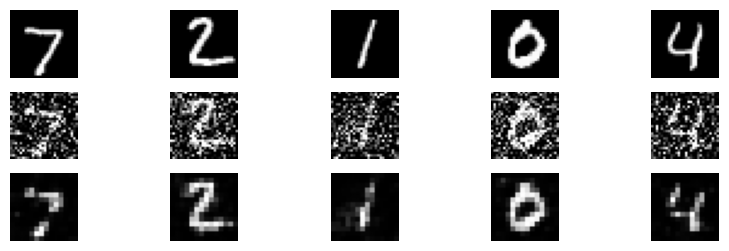

Row-1 : Original Image
Row-2 : Noisy Image
Row-3 : Denoised Image


In [3]:
#Results
import matplotlib.pyplot as plt

n = 5  # Number of images to display
plt.figure(figsize=(10, 3))

for i in range(n):
    # Original Image
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')

    # Noisy Image
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.axis('off')

    # Denoised Image
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')

plt.show()
print("Row-1 : Original Image")
print("Row-2 : Noisy Image")
print("Row-3 : Denoised Image")
